In [5]:
import numpy as np

# The Graph to manipulate

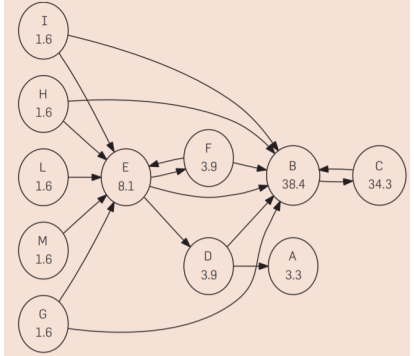

# Graph representation

In [6]:
Graph = {
    "A" : [] ,
    "B" : ["C"] ,
    "C" : ["B"],
    "D" : ["A", "B"],
    "E" : ["B", "D", "F"],
    "F" : ["B", "E"],
    "G" : ["B", "E"],
    "H" : ["B", "E"],
    "I" : ["B", "E"],
    "L" : ["E"],
    "M" : ["E"],
}

# Function to get Agencency Matrix

In [7]:
def adjacencyMatrix(g):
    
    keys=sorted(g.keys())
    size=len(keys)
    Matrix = [ [0]*size for i in range(size) ]
    for i,j in [(keys.index(i), keys.index(j)) for i, row in g.items() for j in row]:
        Matrix[i][j] = 1
    return Matrix

In [9]:
adjac_Matrix = adjacencyMatrix(Graph)

# PageRank Algorithm

# 1 ) Firstly we calculate probability matrix P

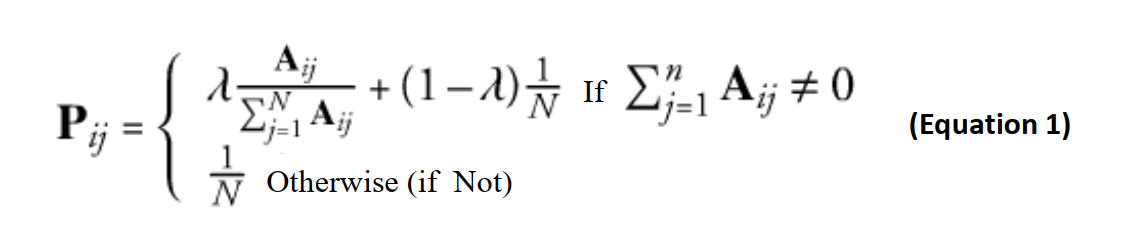

# 2) then we end by calculating the R vector of the  Rank page scores

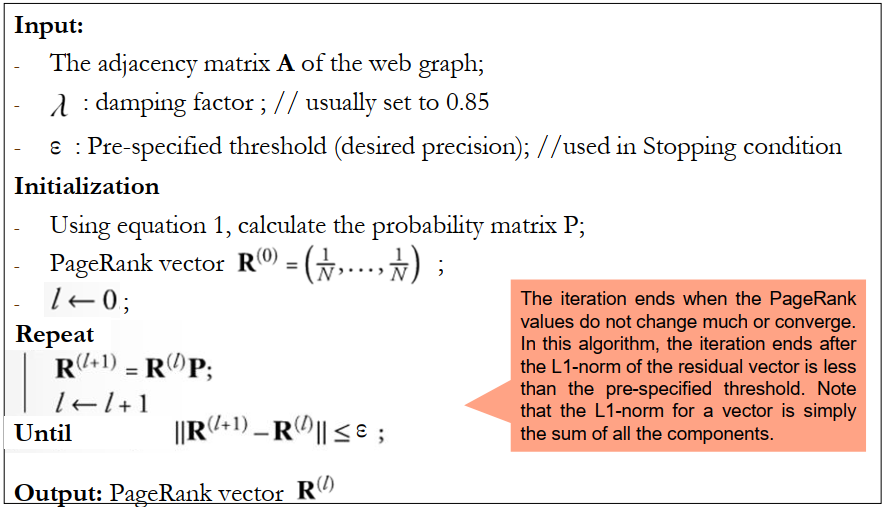

In [12]:
def PageRank_Algo(A, _lambda, epsilon):
    
    #AdjacencyMatrix A
    A = np.array(A, dtype=np.float64)
    
    #ProbabilityMatrix P
    P = np.zeros_like(A, dtype=np.float64)
    
    #N is the total number of nodes in the web graph
    N = P.shape[0]
    
    #Calculate probability matrix P
    for i in range(N):
        Sigma_Aij = np.count_nonzero(A[i])
        for j in range(N):
            if Sigma_Aij != 0:
                P[i][j] = _lambda*(A[i][j]/Sigma_Aij) + (1 - _lambda)*(1/N)
            else:
                P[i][j] = 1/N
                
    #Calculate the Vector R
    R_zero = np.array([1/ N for i in range(N)],dtype=np.float64)
    
    while True:
        R_new = np.dot(R_zero, P)
        if np.allclose(R_new, R_zero, rtol=epsilon) == True:
            return R_new
        R_zero = R_new 
        

# PageRank scores

In [35]:
Scores=PageRank_Algo(adjac_Matrix, 0.85, 0.0001)
graphKeys=list(Graph.keys())

In [40]:
i=0
for s in Scores:
    print(f"Node :{graphKeys[i]} - Score :{round(s*100,1)} %")
    i+=1

Node :A - Score :3.3 %
Node :B - Score :38.4 %
Node :C - Score :34.3 %
Node :D - Score :3.9 %
Node :E - Score :8.1 %
Node :F - Score :3.9 %
Node :G - Score :1.6 %
Node :H - Score :1.6 %
Node :I - Score :1.6 %
Node :L - Score :1.6 %
Node :M - Score :1.6 %


# Our scores are similar to those in the graph

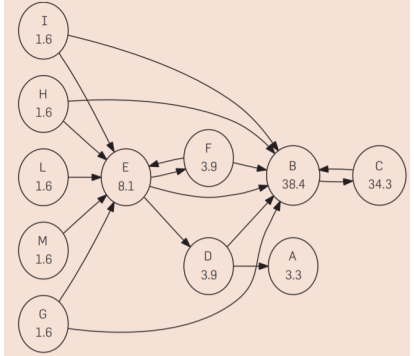